## Twitter Tweets Classification Model

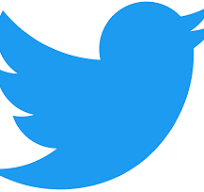

## PROBLEM STATEMENT

classification of twitter speech, to identify which is hatespeech, offensive and which is regular

In [1]:
# upload the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
df = pd.read_csv(r"C:\Users\HomePC\Pictures\speechclf.csv")
df.head(200)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
195,197,3,0,3,0,1,"""@Montrell_: I'm tired of bitches saying I loo..."
196,198,6,0,0,6,2,"""@MotherJones: 10 birds your grandkids may nev..."
197,199,3,0,3,0,1,"""@MvckFadden: ""Stay beautiful you bitch"""""
198,200,3,0,3,0,1,"""@NICKIMINAJ: #WutKinda\n\nr purple. Ceeeleee""..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [4]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [5]:
# drop cols
df = df.drop(columns=['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'])

In [6]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [7]:
#check unique features
print(df['class'].unique())

[2 1 0]


In [8]:
# Mapping class labels 
# Map, and then fill NaN for anything not mapped
df['class'] = df['class'].map({0: 'hate speech', 1: 'offensive', 2: 'none'}).fillna('unspecified')

In [9]:
# Map the 'class' column: 0 -> hate speech, 1 -> offensive, 2 -> none


In [10]:
df.head()

,class,tweet
0,none,!!! RT @mayasolovely: As a woman you shouldn't...
1,offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [11]:
# To get unique values in the 'class' column
df['class'].unique()

array(['none', 'offensive', 'hate speech'], dtype=object)

## DATA CLEANING

In [12]:
#clean data in tweet
#import lib for datacleaning
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HomePC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# define a function to clean text
def clean(tweet):
    text = str(tweet).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df["tweet"] = df["tweet"].apply(clean)

In [14]:
df.head()

,class,tweet
0,none,rt mayasolov woman shouldnt complain clean ho...
1,offensive,rt boy dat coldtyga dwn bad cuffin dat hoe ...
2,offensive,rt urkindofbrand dawg rt ever fuck bitch sta...
3,offensive,rt cganderson vivabas look like tranni
4,offensive,rt shenikarobert shit hear might true might f...


In [15]:
df.sample(5)

,class,tweet
5384,offensive,baabyshaay okaaaaay bitch never care edg stil...
3180,none,fletchermassi telcoag go back mutt rev style ...
7003,none,yall defens trash
197,offensive,mvckfadden stay beauti bitch
7312,offensive,alreadi kno nicca


## feature selection

In [16]:
# transform text to vector
# import the libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pickle

In [17]:
# choose dependent and independent variable
x = np.array(df["tweet"])
y = np.array(df["class"])

In [18]:
# transforming text to vectors
cv = CountVectorizer()


In [19]:
#fit cv in x
X = cv.fit_transform(x)

In [20]:
#save file as pickle
pickle.dump(X, open("cv.pkl", "wb"))

In [21]:
# split into test and train set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [22]:
#print Shape
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (19826, 25693)
y_train shape: (19826,)
x_test shape: (4957, 25693)
y_test shape: (4957,)


## Build Model

In [23]:
# import the algorithm library
# model selection
# from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier




In [24]:
#build model
rfc = RandomForestClassifier(n_estimators= 100, random_state =42)

rfc

RandomForestClassifier(random_state=42)

In [25]:

# Fit Models
model = rfc.fit(x_train, y_train)

In [26]:
model

RandomForestClassifier(random_state=42)

In [27]:
#print Classification for each mode
from sklearn.metrics import classification_report

In [28]:
# make y prdiction
y_pred = model.predict(x_test)
y_pred

array(['offensive', 'offensive', 'offensive', ..., 'offensive',
       'offensive', 'offensive'], dtype=object)

In [29]:


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

 hate speech       0.54      0.27      0.36       290
        none       0.82      0.82      0.82       835
   offensive       0.92      0.95      0.94      3832

    accuracy                           0.89      4957
   macro avg       0.76      0.68      0.71      4957
weighted avg       0.88      0.89      0.88      4957



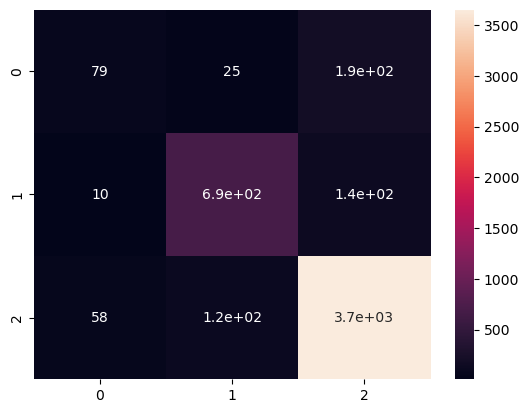

In [30]:
from sklearn.metrics import confusion_matrix

# print and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

# Make Predictions with the Model

In [31]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(user, output)

fuck you ['offensive']


In [32]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(user, output)

i lovely day ['offensive']


In [33]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output =  model.predict(data)
print(user, output)

dont fag ['hate speech']


In [34]:
#save the Model
with open ('model.pkl', 'wb') as f:
    pickle.dump(model, f)